In [37]:
import pandas as pd
df = pd.read_csv('training_data.csv', encoding="unicode_escape")

In [38]:
X = df.drop('label', axis=1).values
y = df['label'].values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
set(y_train)

{'A', 'B', 'C', 'D', 'E'}

In [42]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
print(X_train.shape) # Debería mostrar (número de muestras de entrenamiento, número de sensores y valores de giroscopio)
print(y_train.shape) # Debería mostrar (número de muestras de entrenamiento, número de clases)

(12505, 18)
(12505, 5)


In [44]:
y

array(['A', 'A', 'A', ..., 'E', 'E', 'E'], dtype=object)

**MODELO**

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=18, activation='relu')) # Capa de entrada con N neuronas y función de activación ReLU
model.add(Dense(128, activation='relu')) # Capa oculta con 128 neuronas y función de activación ReLU
model.add(Dropout(0.5)) # Dropout para evitar el sobreajuste
model.add(Dense(5, activation='softmax')) # Capa de salida con 27 neuronas y función de activación softmax
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Función de pérdida, algoritmo de optimización y métricas de evaluación

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1216      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 645       
                                                                 
Total params: 10,181
Trainable params: 10,181
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test)) # Datos de entrenamiento, épocas, tamaño del lote y datos de validación

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.7222 - accuracy: 0.6772 - val_loss: 0.4236 - val_accuracy: 0.7419
Epoch 2/50
391/391 [==============================] - 1s 3ms/step - loss: 0.4313 - accuracy: 0.7358 - val_loss: 0.3977 - val_accuracy: 0.7435
Epoch 3/50
391/391 [==============================] - 1s 4ms/step - loss: 0.4038 - accuracy: 0.7422 - val_loss: 0.3743 - val_accuracy: 0.7454
Epoch 4/50
391/391 [==============================] - 1s 4ms/step - loss: 0.3910 - accuracy: 0.7399 - val_loss: 0.3755 - val_accuracy: 0.7448
Epoch 5/50
391/391 [==============================] - 1s 4ms/step - loss: 0.3838 - accuracy: 0.7396 - val_loss: 0.3662 - val_accuracy: 0.7454
Epoch 6/50
391/391 [==============================] - 1s 4ms/step - loss: 0.3791 - accuracy: 0.7390 - val_loss: 0.3629 - val_accuracy: 0.7483
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 0.3747 - accuracy: 0.7455 - val_loss: 0.3628 - val_accuracy: 0.7410
Epoch 

In [48]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test) # Datos de evaluación
print("Loss: ", loss)
print("Accuracy: ", accuracy)

98/98 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.7435
Loss:  0.3592190742492676
Accuracy:  0.7435241341590881


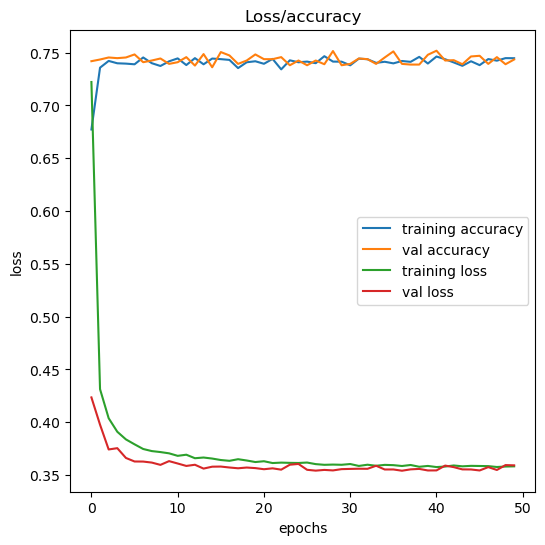

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [50]:
model.save("model.h5")